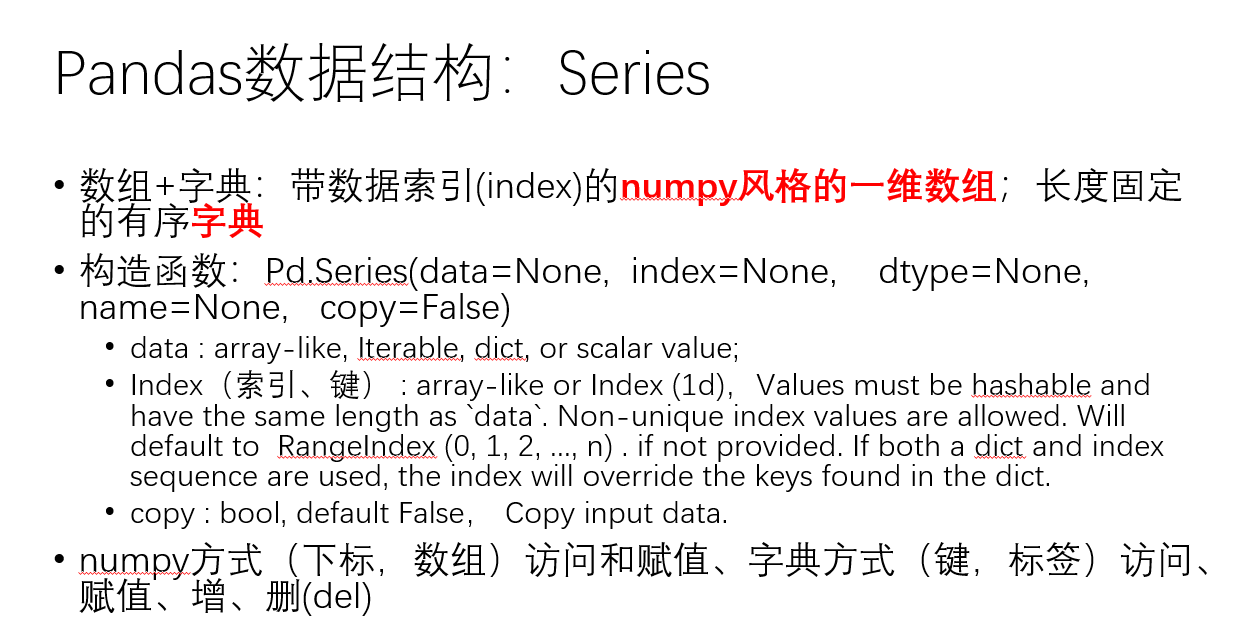

In [1]:
import pandas as pd
import numpy as np

# 创建Series的方式
* array-like
* iterable
* dict
* scalar value

In [9]:
obj = pd.Series([1,4,6,7]) #array-like
obj

0    1
1    4
2    6
3    7
dtype: int64

In [8]:
obj = pd.Series(np.arange(6)) #iterable
obj

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

In [10]:
obj = pd.Series({'a':1,'b':2})#dict
obj

a    1
b    2
dtype: int64

In [12]:
obj = pd.Series(4) #scalar value
obj

0    4
dtype: int64

# Index 
* array-like or Index (1d)，Values must be hashable and have the same length as `data`.
* Non-unique index values are allowed. Will default to  RangeIndex (0, 1, 2, ..., n) . if not provided. 
* If both a dict and index sequence are used, the index will override the keys found in the dict.


In [13]:
a = ['bac', 'abc', 'csd', 'css']  #等长
obj = pd.Series([1,7,5,4], index=a)
obj

bac    1
abc    7
csd    5
css    4
dtype: int64

In [14]:
a = ['abc', 'abc', 'csd', 'css']  #允许相同的键
obj = pd.Series([1,7,5,4], index=a)
obj

abc    1
abc    7
csd    5
css    4
dtype: int64

In [15]:
obj = pd.Series([1, 4, 6, 8]) #默认是RangeIndex(0,1,2,...,n)
obj

0    1
1    4
2    6
3    8
dtype: int64

In [20]:
obj = pd.Series({'a':1,'b':3,'c':5,'d':7}) #如果同时使用字典和索引序列，则索引将覆盖在字典中找到的键
obj

a    1
b    3
c    5
d    7
dtype: int64

In [22]:
obj.index = ['abc', 'abc', 'csd', 'css']  
obj

abc    1
abc    3
csd    5
css    7
dtype: int64

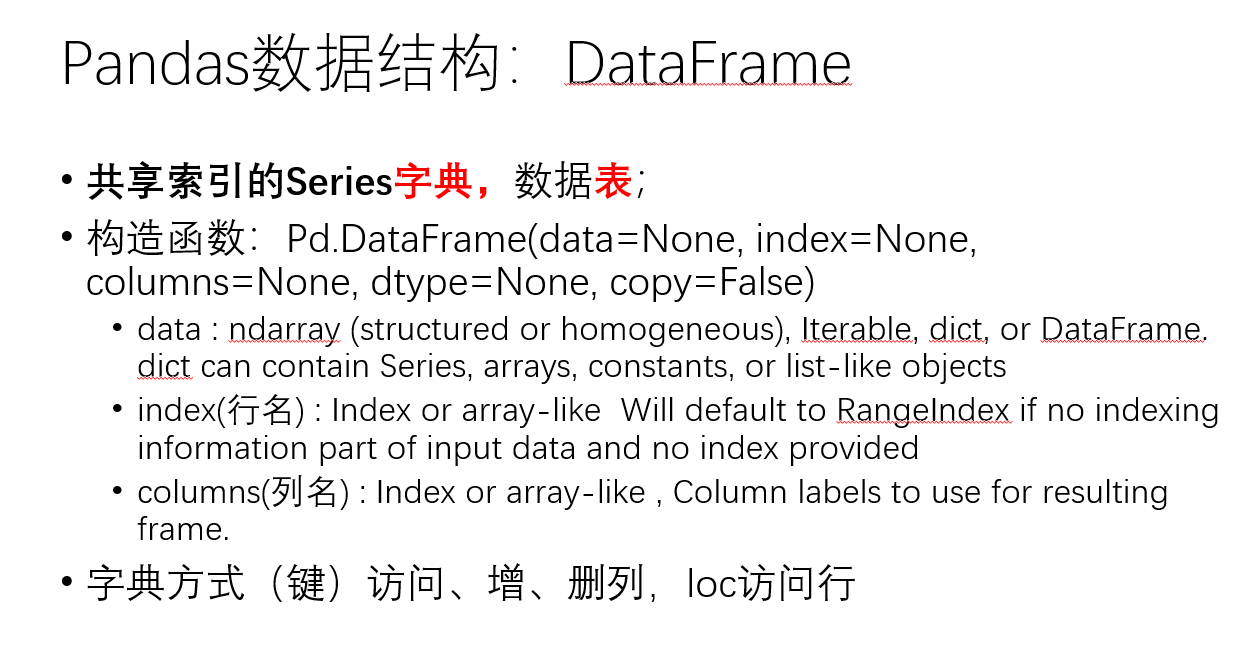

# 创建DataFrame
* ndarray (structured or homogeneous), Iterable, dict, or DataFrame.   
  dict can contain Series, arrays, constants, or list-like objects!

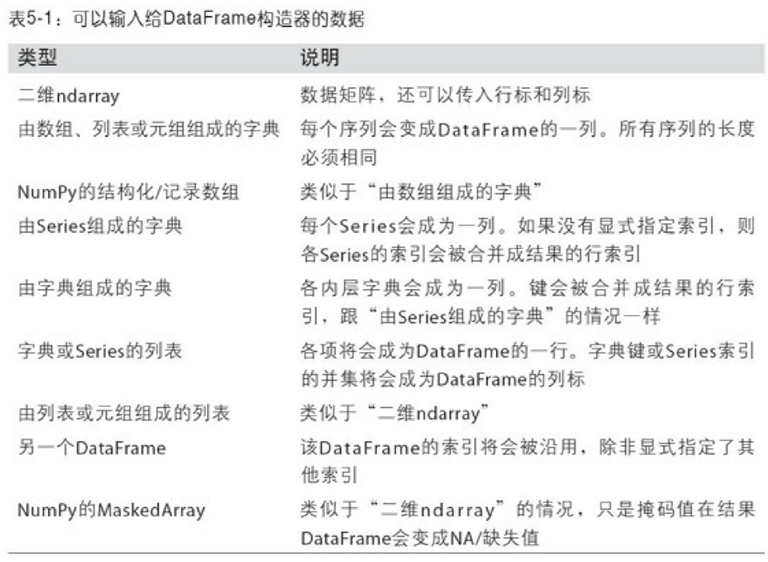

In [23]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],  #由数组，列表或元组组成的字典
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data) #index未指定，默认会自动添加

In [24]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [25]:
pd.DataFrame(data, columns=['year', 'state', 'pop']) #改变列明次序，按你放置的顺序排列

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [26]:
frame = pd.DataFrame([[1,2,3],[2,3,4],[4,5,6]])   #列表或元组组成的列表
frame

,0,1,2
0,1,2,3
1,2,3,4
2,4,5,6


In [27]:
obj = pd.Series([4,5,6,4])                   
obj
frame = pd.DataFrame({'a':obj,                  #由Series组成的字典
                      'b':obj})
frame

,a,b
0,4,4
1,5,5
2,6,6
3,4,4


In [29]:
frame = pd.DataFrame({'A': {'a':1,'b':2,'c':3},  #由字典组成的字典
                      'B': {'d':5,'e':6}})       #外层key作为columns，内层key作为Index
frame

,A,B
a,1.0,NaN
b,2.0,NaN
c,3.0,NaN
d,NaN,5.0
e,NaN,6.0


In [36]:
frame = pd.DataFrame([obj],index=[1,5,8,9])  #由字典或Series组成的列表(Series)，
frame  #第一个列表是值，columns默认值， 第二个列表是index

,0,1,2,3
1,4,5,6,4
5,4,5,6,4
8,4,5,6,4
9,4,5,6,4


In [38]:
dict = {'a':1,'b':2,'c':3}
frame = pd.DataFrame([dict],index=[0,1])  #由字典或Series组成的列表(字典)
frame

,a,b,c
0,1,2,3
1,1,2,3


In [39]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [40]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [41]:
frame2['state'] #检索列

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [42]:
frame2.year #检索列

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [43]:
frame2.loc['three'] #检索行

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [44]:
frame2['debt'] = 6.5 #列赋值
frame2 

,year,state,pop,debt
one,2000,Ohio,1.5,6.5
two,2001,Ohio,1.7,6.5
three,2002,Ohio,3.6,6.5
four,2001,Nevada,2.4,6.5
five,2002,Nevada,2.9,6.5
six,2003,Nevada,3.2,6.5


In [45]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [46]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val  #Series赋值给DataFrame的一列
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [47]:
#新增一列
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [48]:
#删除一列
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [49]:
frame2.T

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,NaN,-1.2,NaN,-1.5,-1.7,NaN


In [51]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

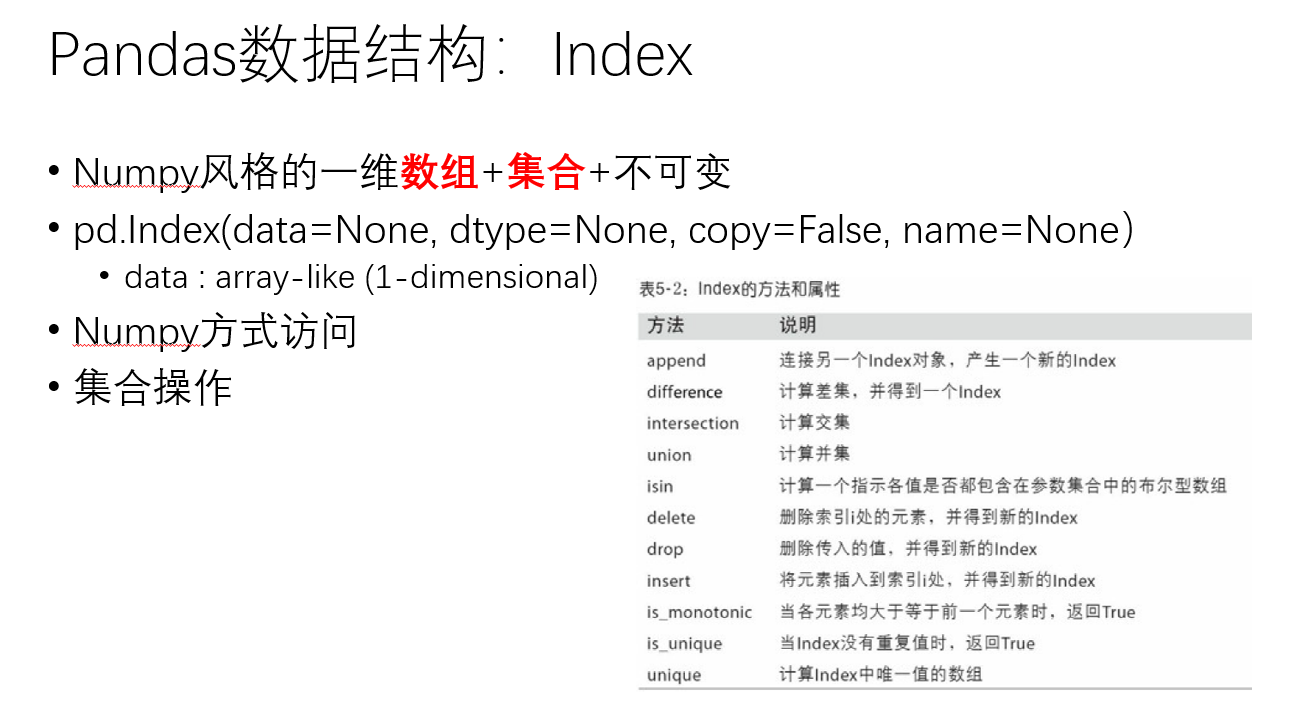

In [53]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [54]:
index = frame2.index
index[2:]

Index(['three', 'four', 'five', 'six'], dtype='object')

In [56]:
index[1] = 51  #索引对象不可变

TypeError: Index does not support mutable operations

In [57]:
#不同于python的集合，pandas的index允许有重复的列名出现
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

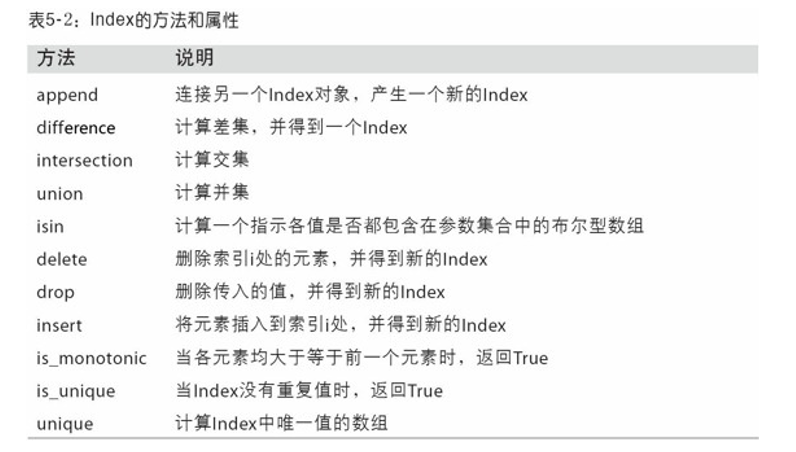

In [58]:
frame2.index.append(dup_labels)

Index(['one', 'two', 'three', 'four', 'five', 'six', 'foo', 'foo', 'bar',
       'bar'],
      dtype='object')

In [59]:
dup_labels.is_unique

False

## Reindex

In [60]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [61]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [62]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [63]:
obj3.reindex(range(6), method='ffill')  #前向值填充 forward

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [64]:
obj3.reindex(range(6),method='bfill')   #后向值填充 backward

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [66]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [67]:
frame2 = frame.reindex(['a', 'b', 'c', 'd']) #预设是第0轴,也就是index
frame2 

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [68]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)      

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


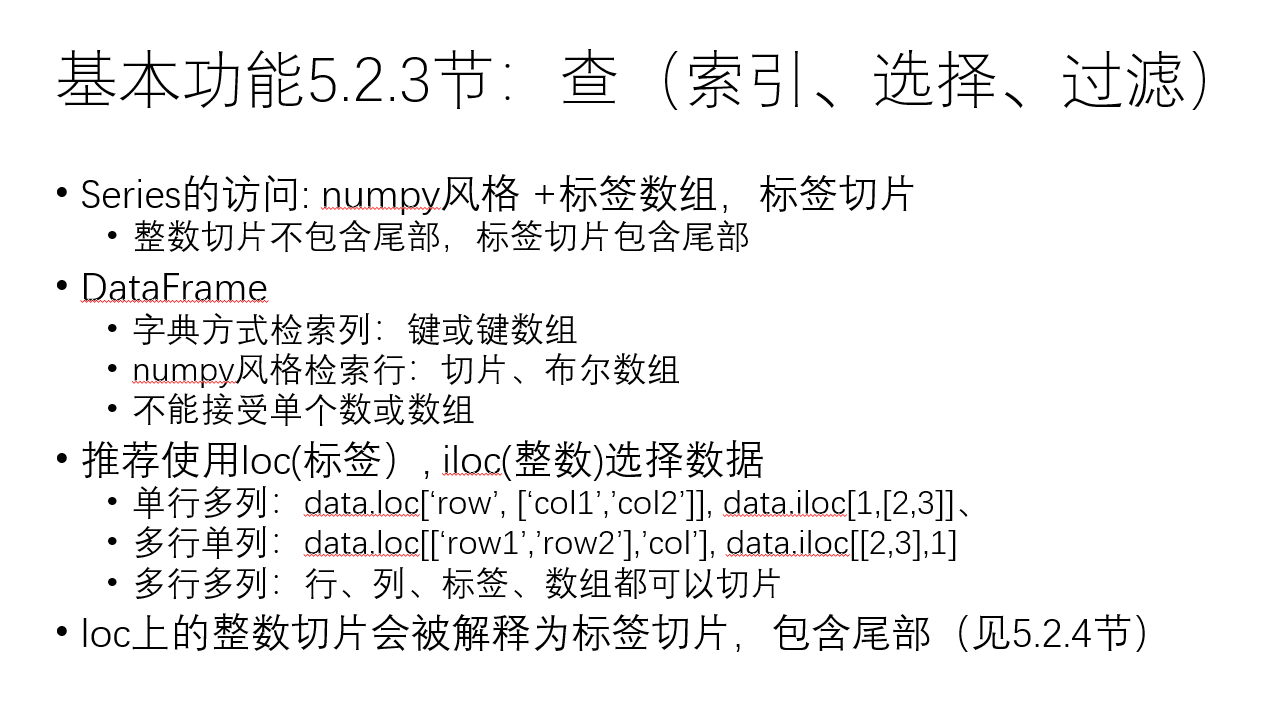

* Series 

In [69]:
obj = pd.Series([4, 7, 5, 3], index=['a','b','c','d'])
obj


a    4
b    7
c    5
d    3
dtype: int64

In [70]:
obj['b']

7

In [71]:
obj[1]  #检索的是位置，不是值

7

In [75]:
obj[1:2]

b    7
dtype: int64

In [73]:
obj[['b', 'a', 'd']]

b    7
a    4
d    3
dtype: int64

In [74]:
obj['b':'c'] #Serise.index检索包含端点

b    7
c    5
dtype: int64

In [76]:
obj['b':'c'] = 5 #是包含端点的 
obj

a    4
b    5
c    5
d    3
dtype: int64

### Series检索多个位置方法：
* 1.obj[[*, *]]
* 2.obj[* : *]
* 3.obj[['index1','index2']]
* 3.obj['index1':'index2'] 该方法包含index2的位置
整数切片不包含尾部，标签切片包含尾部

####  DataFrame
* 字典方式检索列：键或键数组
* numpy风格检索行：切片、布尔数组
* 不能接受单个数或数组


In [78]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
data['two']  #字典方式检索列 键

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [80]:
data[['three', 'one']] #字典方式检索列 键数组

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [81]:
data[:2]  #切片的方式检索行

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [82]:
data['Ohio': 'Colorado']  #切片选取行名且包含尾部

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [88]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


* 不能接受单个数或数组，会报错

推荐使用loc(标签）, iloc(整数)选择数据
单行多列：data.loc[‘row’, [‘col1’,’col2’]], data.iloc[1,[2,3]]、
多行单列：data.loc[[‘row1’,’row2’],’col’], data.iloc[[2,3],1]
多行多列：行、列、标签、数组都可以切片
loc上的整数切片会被解释为标签切片，包含尾部

In [89]:
data.loc['Colorado', ['two', 'three']] #单行多列

two      5
three    6
Name: Colorado, dtype: int32

In [90]:
data.iloc[1:2, 1:3]    

,two,three
Colorado,5,6


In [91]:
data.iloc[2, [3, 0, 1]]  #第二行，第三，零，一列

four    11
one      8
two      9
Name: Utah, dtype: int32

In [92]:
data.iloc[2:3, [3, 0, 1]]#like this

,four,one,two
Utah,11,8,9


In [93]:
#前面行检索必须有冒号，然后后面有冒号或后面至少有两列表示，一列不会出现下图
data.iloc[1:2,[1, 2]] 

,two,three
Colorado,5,6


In [94]:
data.iloc[:,:3][data.three > 5] #布尔选取行

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


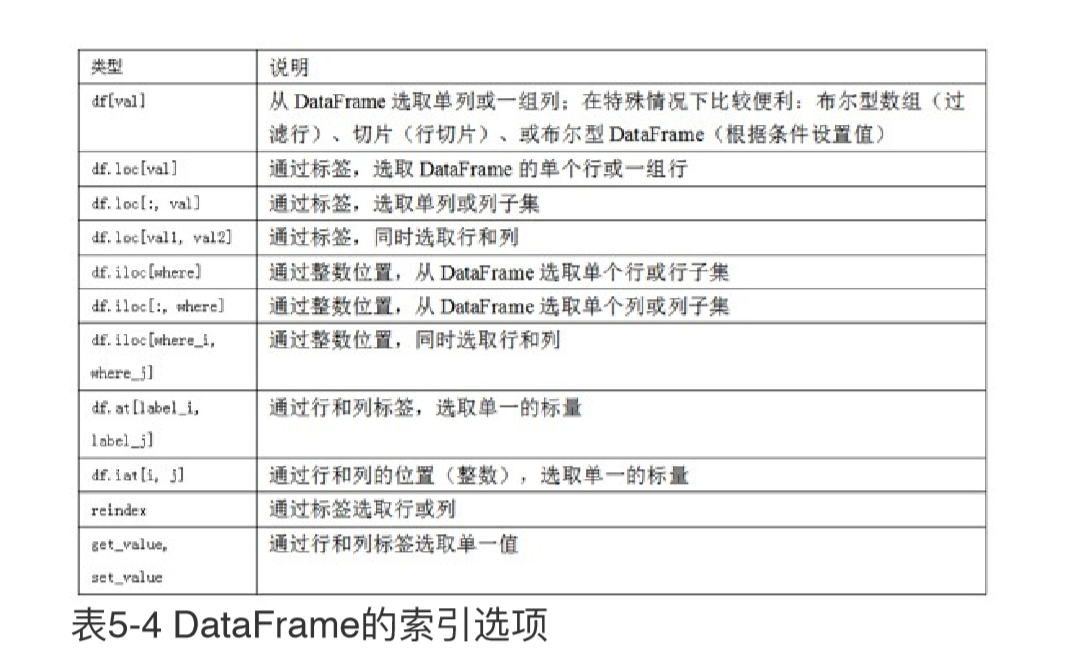

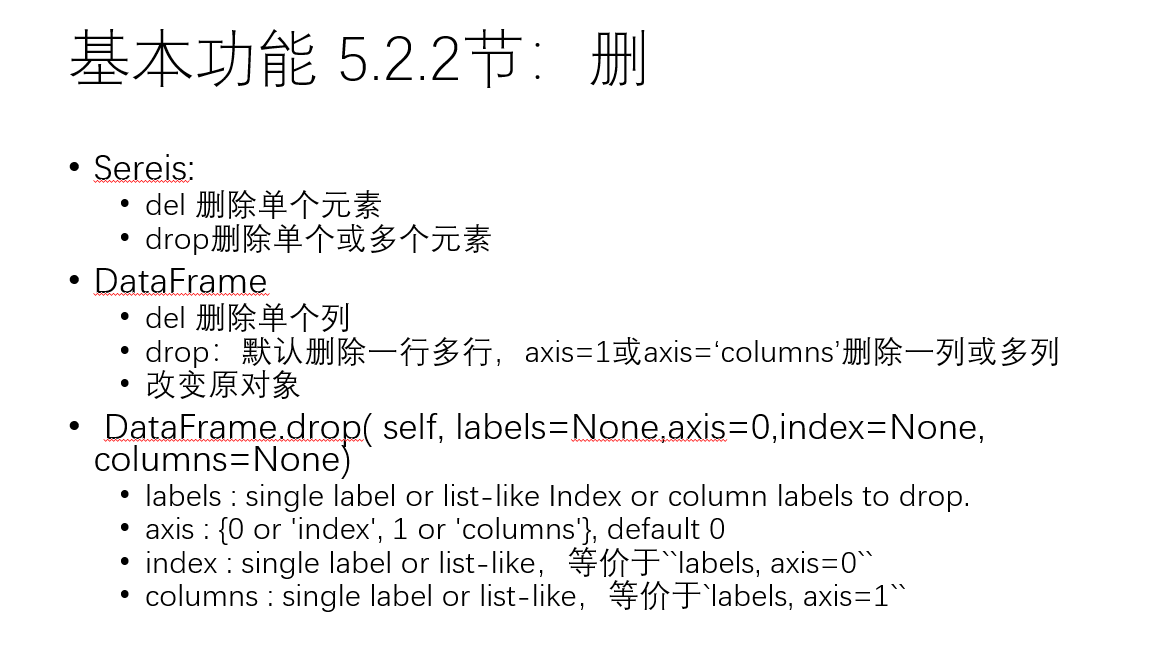

In [95]:
obj = pd.Series([1,5,6,4])
obj

0    1
1    5
2    6
3    4
dtype: int64

In [96]:
del obj[1] #删除单个元素

In [97]:
obj

0    1
2    6
3    4
dtype: int64

In [100]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [101]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [102]:
obj.drop(['d', 'c']) #删除多个元素

a    0.0
b    1.0
e    4.0
dtype: float64

In [104]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [108]:
del data['one'] #删除单个列

In [109]:
data

,two,three,four
Ohio,1,2,3
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


In [110]:
data.drop('Ohio',axis=0) #默认删除一行或多行

,two,three,four
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


In [111]:
data.drop(['Colorado', 'Utah'])

,two,three,four
Ohio,1,2,3
New York,13,14,15


In [113]:
data.drop(['two', 'four'], axis='columns') #设置列，可以删除一列或多列

,three
Ohio,2
Colorado,6
Utah,10
New York,14


In [114]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [115]:
obj.drop('c', inplace=True) #inplace就地修改
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

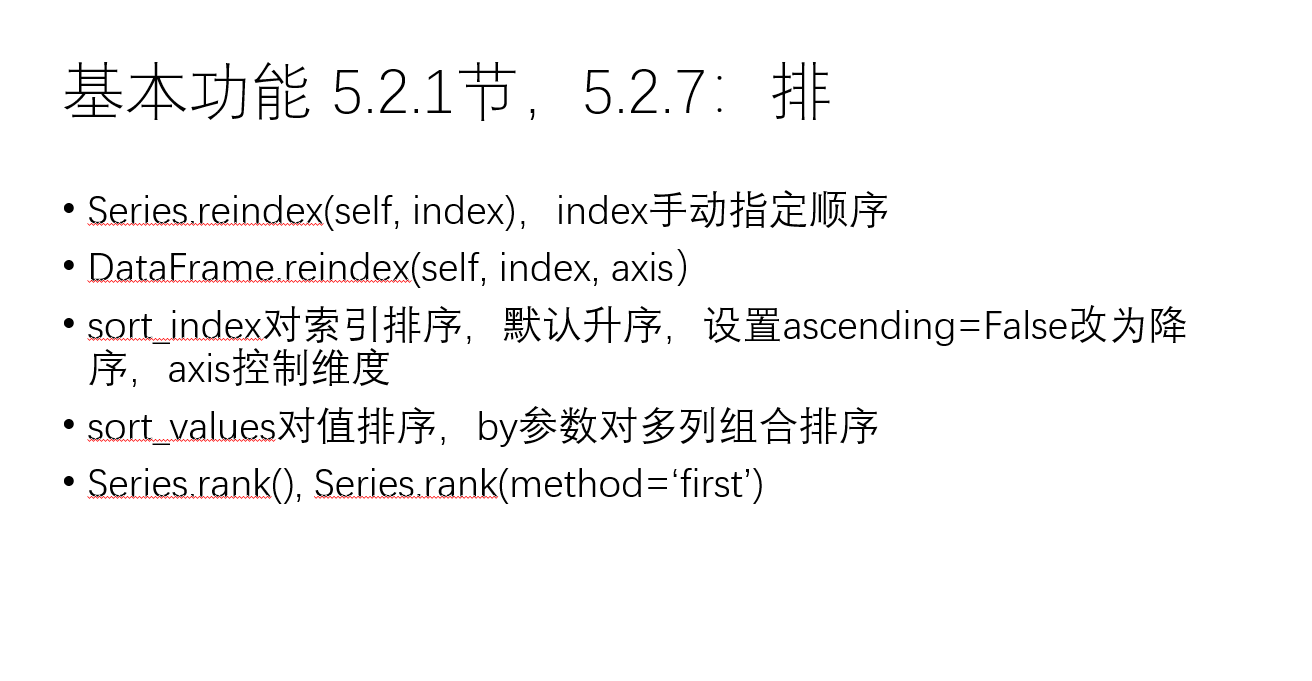

* reindex再写一遍

In [2]:
import pandas as pd
import numpy as np
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [3]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [4]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [5]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [6]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [7]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [8]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [9]:
frame.loc[['a', 'b', 'c', 'd'], states]

C:\Users\admin\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### Sorting and Ranking
* sort_index对索引排序，默认升序，设置ascending=False改为降序，axis控制维度
* sort_values对值排序，by参数对多列组合排序

In [10]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [11]:
obj.sort_index(ascending=False)

d    0
c    3
b    2
a    1
dtype: int64

In [13]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [14]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [15]:
frame.sort_index(axis=1, ascending=False) #columns，降序

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [16]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [17]:
obj.sort_values()  #默认升序

2   -3
3    2
0    4
1    7
dtype: int64

In [18]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2]) #NaN不在范围内
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [19]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [20]:
frame.sort_values(by='b') #按b的列排序

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [21]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [23]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [24]:
obj.rank() #排名 rank分    先从低到高排序然后相同的值取一个平均值

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [31]:
obj.rank?

In [30]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [26]:
obj.rank(method='first') #排名从1开始，先遇到的为排名高

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [27]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [28]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [29]:
frame.rank(axis='columns')  #对列操作排序

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


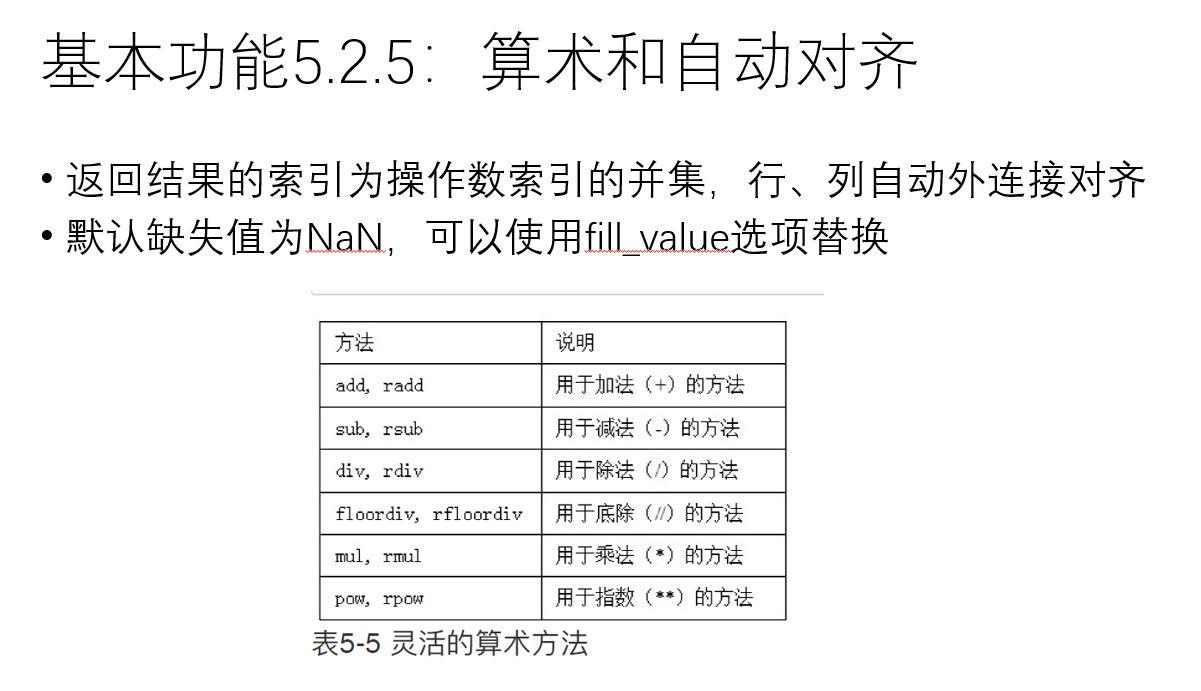

In [33]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [34]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [35]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [36]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [37]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [38]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [39]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1

,A
0,1
1,2


In [40]:
df2

,B
0,3
1,4


In [42]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [43]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [44]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [45]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [46]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [47]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [48]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [49]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


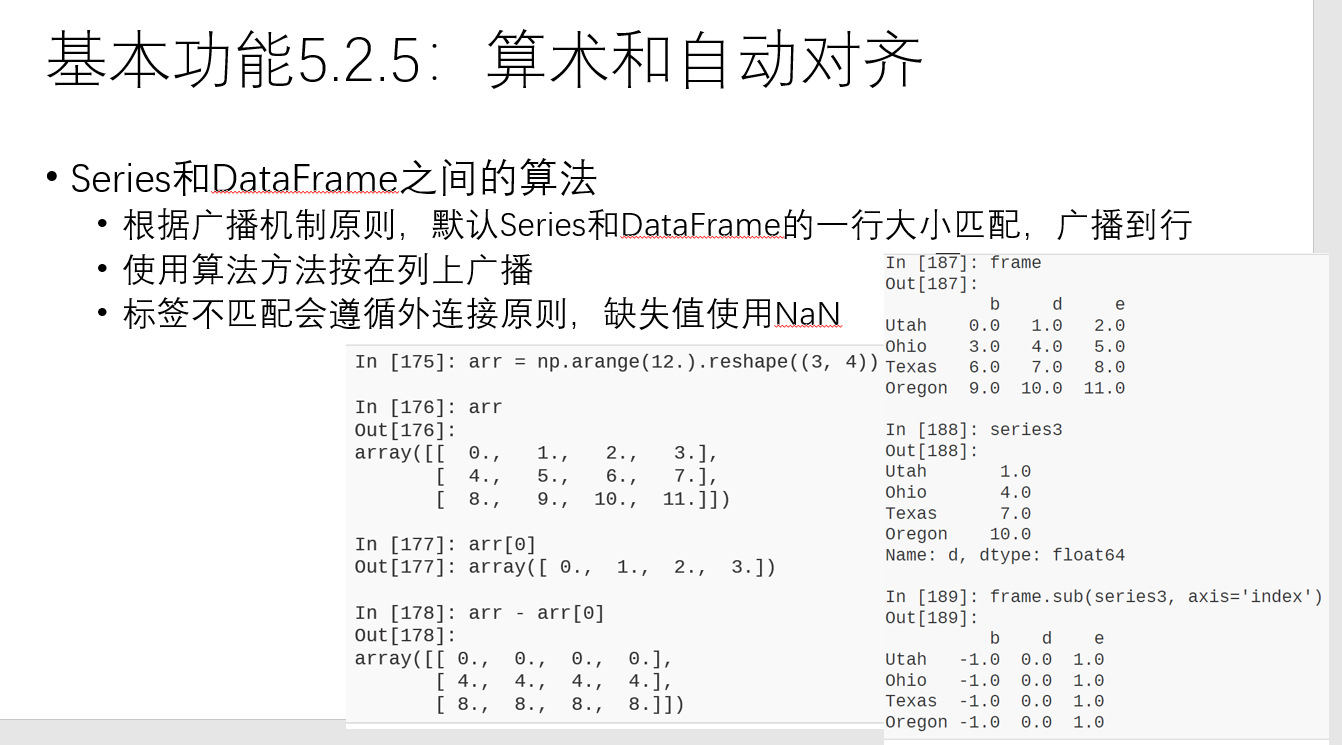

In [52]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [51]:
arr[0]

array([0., 1., 2., 3.])

In [53]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [54]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [55]:
series = frame.iloc[0]

In [56]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [57]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [58]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [59]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [60]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [61]:
series3 = frame['d']

In [62]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [63]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [64]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


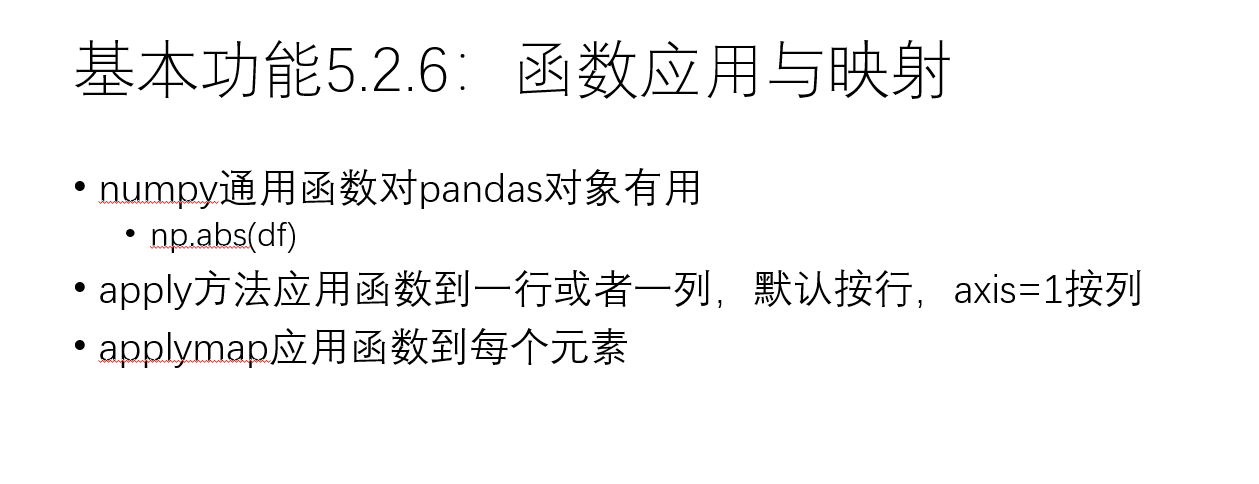

In [65]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.133169,2.326478,-1.092303
Ohio,-0.521739,-0.087405,0.505608
Texas,-1.467574,-0.671531,0.745206
Oregon,-0.317015,1.336926,-1.054049


In [66]:
np.abs(frame)

,b,d,e
Utah,0.133169,2.326478,1.092303
Ohio,0.521739,0.087405,0.505608
Texas,1.467574,0.671531,0.745206
Oregon,0.317015,1.336926,1.054049


In [67]:
f = lambda x: x.max() - x.min()

In [68]:
frame.apply(f)

b    1.334405
d    2.998009
e    1.837508
dtype: float64

In [69]:
frame.apply(f, axis='columns')

Utah      3.418780
Ohio      1.027348
Texas     2.212780
Oregon    2.390975
dtype: float64

In [70]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.467574,-0.671531,-1.092303
max,-0.133169,2.326478,0.745206


In [71]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.13,2.33,-1.09
Ohio,-0.52,-0.09,0.51
Texas,-1.47,-0.67,0.75
Oregon,-0.32,1.34,-1.05


In [72]:
frame['e'].map(format)

Utah      -1.09
Ohio       0.51
Texas      0.75
Oregon    -1.05
Name: e, dtype: object

map()是Series对象的一个函数，DataFrame中没有map()，map()的功能是将一个自定义函数作用于Series对象的每个元素。
apply()函数的功能是将一个自定义函数作用于DataFrame的行或者列
applymap()函数的功能是将自定义函数作用于DataFrame的所有元素
注意： DataFrame对象的一行或者一列可以看成一个Series对象，因此也适用map()函数，几个对象之间可以互相转化，注意灵活使用。